# Arbeitspaket (AP) 3: Multimodal Interactions - Images

## Persönliche Angaben (bitte ergänzen)

<table>
  <tr>
    <td>Vorname:</td>
    <td>Janine</td>
  </tr>
  <tr>
    <td>Nachname:</td>
    <td>Heinemeyer</td>
  </tr>
  <tr>
    <td>Immatrikulationsnummer:</td>
    <td>19766534</td>
  </tr>
  <tr>
    <td>Modul:</td>
    <td>Data Science</td>
  </tr>
  <tr>
    <td>Prüfungsdatum / Raum / Zeit:</td>
    <td>16.12.2024 / Raum: SF O3.54 / 8:00 – 12:30</td>
  </tr>
  <tr>
    <td>Erlaubte Hilfsmittel:</td>
    <td>w.MA.XX.DS.24HS (Data Science)<br>Open Book, Eigener Computer, Internet-Zugang</td>
  </tr>
  <tr>
  <td>Nicht erlaubt:</td>
  <td>Nicht erlaubt ist der Einsatz beliebiger Formen von generativer KI (z.B. Copilot, ChatGPT) <br> sowie beliebige Formen von Kommunikation oder Kollaboration mit anderen Menschen.</td>
</tr>
</table>

## Bewertungskriterien


Der Code für jede Aufgabe wird gemäss dem folgenden Schema bewertet. Die Gesamtpunktzahl beträgt maximal 48 Punkte, wobei jede Aufgabe bis zu 8 Punkte bzw. 4 Punkte erreichen kann.



| **Kategorie**                       | **Beschreibung**                                                                                                                                          | **Punkteverteilung**                |
|-------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------|
| **Code nicht lauffähig oder Ergebnisse nicht relevant** | Der Code läuft nicht oder erfüllt nicht die Anforderungen des Aspekts (z. B. Bilder werden nicht geladen, die Textausgabe der Extraktion fehlt, Bounding Boxes werden nicht angezeigt). | **0 Punkte**                       |
| **Code lauffähig, aber mit gravierenden Mängeln**       | Der Code läuft, jedoch fehlen zentrale Teile der Funktionalität eines Aspekts (z. B. unvollständige Extraktion von Bildinformationen oder Fehler bei der Definition eines Schemas). | **25% der max. erreichbaren Punkte** |
| **Code lauffähig, aber mit mittleren Mängeln**          | Der Code läuft und liefert teilweise korrekte Ergebnisse für einen Aspekt, aber wichtige Details fehlen (z. B. ungenaue Bounding Boxes, unvollständige Integration der extrahierten Daten). | **50% der max. erreichbaren Punkte** |
| **Code lauffähig, aber mit minimalen Mängeln**          | Der Code erfüllt die Anforderungen eines Aspekts weitgehend, aber kleinere Fehler oder Abweichungen (z. B. nicht robust Extraktionsdaten, kleinere Schemaabweichungen, Prompt zu wenig stringent formuliert -> teilweise unstabile Output)sind vorhanden. | **75% der max. erreichbaren Punkte** |
| **Code lauffähig und korrekt**                         | Der Code erfüllt die Anforderungen des Aspekts vollständig und liefert die erwarteten Ergebnisse ohne Fehler (z. B. korrekte Extraktion, vollständige Bounding Boxes, saubere Integration). | **100% der max. erreichbaren Punkte** |

---





## **Vorbereitung (Dieser Teil wird nicht bewertet!)**

1.) Starten Sie eine GitHub Codespaces Instanz auf Basis Ihres Forks von diesem Github Repository

2.) Erstellen Sie eine neue  Datei .env in Ihrem Codespace, die die API-Keys als ENV-Variabel enthält, und laden Sie diese in Ihrem Code mithilfe der dotenv Library.

## **Aufgabe (Dieser Teil wird bewertet!)**

### **Hinweise zum folgenden Arbeitspaket:**

Im Rahmen dieses Arbeitspakets sollen Sie eine Objekterkennung durchführen, indem Sie ein Modell Ihrer Wahl verwenden, das Texte nutzt, um Informationen aus Bildern zu extrahieren. Die folgenden zwei Bilder stehen Ihnen zur Verfügung:  
**`prescription1.jpg`** und **`hospital_scene.jpeg`**.

- **`prescription1.jpg`** zeigt ein handgeschriebenes ärztliches Rezept für einen/eine Patienten/Patientinnen. Auf dem Rezept sind neben den Informationen zu den verschriebenen Medikamenten auch der Name, das Geschlecht und das Geburtsdatum des Patienten angegeben.
- **`hospital_scene.jpeg`** zeigt eine Krankenhauszimmerszene, in der sich zwei Patienten und einige Besucher befinden.

Stellen Sie sich vor, Sie entwickeln nun ein Programm für einen medizinischen Assistenzroboter, der hypothetisch das richtige Medikament an den richtigen Patienten ausliefert. Verwenden Sie die bereitgestellten Bilder als Informationsquelle.


**Erwartetes Ergebnis:**  
    Das Programm sollte die Koordinaten eines Begrenzungsrahmens (Bounding Box) liefern, der die Person im Bild **`hospital_scene.jpeg`** identifiziert, die das Medikament gemäss dem Rezept erhalten soll.
    Zeichnen Sie die Bounding Box direkt auf das Bild **`hospital_scene.jpeg`**, speichern Sie es als **`hospital_scene_patient1_identified.jpeg`**.

  Verwenden Sie dasselbe Notebook mit den Bildern im Ordner **`extra_case/prescription2.jpg`**. Führen Sie das Notebook mit diesem anderen Rezept aus und prüfen Sie, ob der Code auch in diesem Fall die richtige Person korrekt identifizieren kann. Speichern Sie das finale Bild als **`hospital_scene_patient2_identified.jpeg`**.

**Einreichungsdokumente:**  
  Die Einreichung dieser Aufgabe sollte Folgendes umfassen:  
  - Das von Ihnen bearbeiteten Notebook (dieses File).  
  - Das erzeugte Bild **`hospital_scene_patient1_identified.jpeg`**.  
  - Das erzeugte Bild **`hospital_scene_patient2_identified.jpeg`**.  

## Utils (Hilfsfunktionen):

Hier finden Sie einige vorgefertigte Funktionen, die Ihnen helfen, Bounding Boxes zu visualisieren und zu plotten sowie verschiedene Arten von Output zu parsen. Sie könnten Diese benutzen oder neue Funktionen selbst erstellen, falls notwendig.

In [5]:
import json
from PIL import Image, ImageDraw
from PIL import ImageColor
import re

additional_colors = [colorname for (colorname, colorcode) in ImageColor.colormap.items()]

def plot_bounding_boxes(im, noun_phrases_and_positions):
    """
    Plots bounding boxes on an image with markers for each noun phrase, using PIL, normalized coordinates, and different colors.

    Args:
        img_path: The path to the image file.
        noun_phrases_and_positions: A list of tuples containing the noun phrases
         and their positions in normalized [y1 x1 y2 x2] format.
    """

    # Load the image
    img = im
    width, height = img.size
    print(img.size)
    # Create a drawing object
    draw = ImageDraw.Draw(img)

    # Define a list of colors
    colors = [
    'red',
    'green',
    'blue',
    ] + additional_colors

    # Iterate over the noun phrases and their positions
    for i, (noun_phrase, (y1, x1, y2, x2)) in enumerate(
        noun_phrases_and_positions):
        # Select a color from the list
        color = colors[i % len(colors)]

        # Convert normalized coordinates to absolute coordinates
        abs_x1 = int(x1/1000 * width)
        abs_y1 = int(y1/1000 * height)
        abs_x2 = int(x2/1000 * width)
        abs_y2 = int(y2/1000 * height)

        # Draw the bounding box
        draw.rectangle(
            ((abs_x1, abs_y1), (abs_x2, abs_y2)), outline=color, width=4
        )

        # Draw the text
        draw.text((abs_x1 + 8, abs_y1 + 6), noun_phrase, fill=color)

    # Display the image
    img.show()

# @title Parsing utils
def parse_list_boxes(text):
  result = []
  for line in text.strip().splitlines():
    # Extract the numbers from the line, remove brackets and split by comma
    try:
      numbers = line.split('[')[1].split(']')[0].split(',')
    except:
      numbers =  line.split('- ')[1].split(',')

    # Convert the numbers to integers and append to the result
    result.append([int(num.strip()) for num in numbers])

  return result



def parse_json_in_output(output):
    """
    Extracts and converts JSON-like data from the given text output to a Python dictionary.
    
    Args:
        output (str): The text output containing the JSON data.
    
    Returns:
        dict: The parsed JSON data as a Python dictionary.
    """
    # Regex to extract JSON-like portion
    json_match = re.search(r"\{.*?\}", output, re.DOTALL)
    if json_match:
        json_str = json_match.group(0)
        # Fix single quotes and ensure proper JSON formatting
        json_str = json_str.replace("'", '"')  # Replace single quotes with double quotes
        try:
            # Convert the fixed JSON string into a dictionary
            json_data = json.loads(json_str)
            return json_data
        except json.JSONDecodeError:
            return "The extracted JSON is still not valid after formatting."
    else:
        return "No JSON data found in the given output."

### <b>Aufgabe (1): Laden und Visualisieren von Bildern / Importing notwendige Libraries</b>
Details zur Aufgabenstellung:
- Laden und visualisieren Sie die Bilder `prescription1.jpg` und `hospital_scene.jpeg`
- Die notwendige Libraries für das AP hier importieren

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>



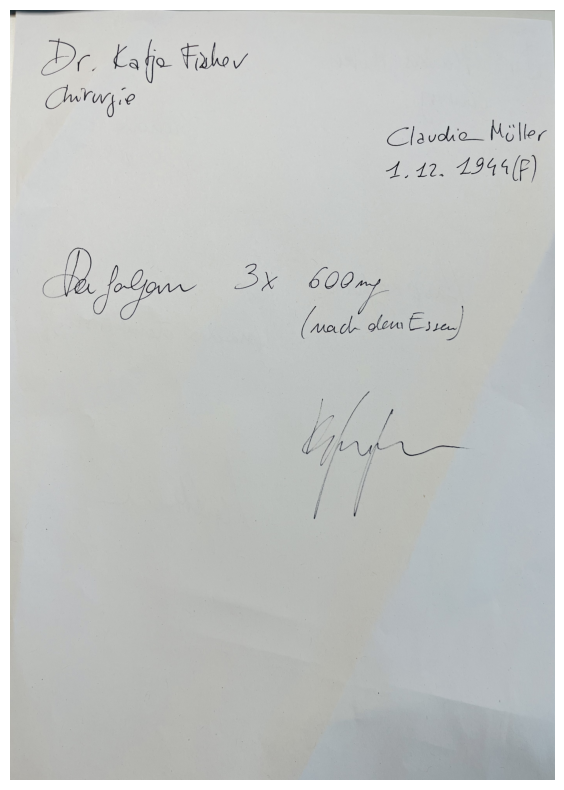

In [6]:
import json
from PIL import Image
import matplotlib.pyplot as plt


# Function to plot bounding boxes on the image
def image_generator(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Plot the bounding boxes on the image
img_path = "/workspaces/DS-HS24-LNWBlock3-AP03/extra_case/prescription2.jpg"
image_generator(Image.open(img_path))


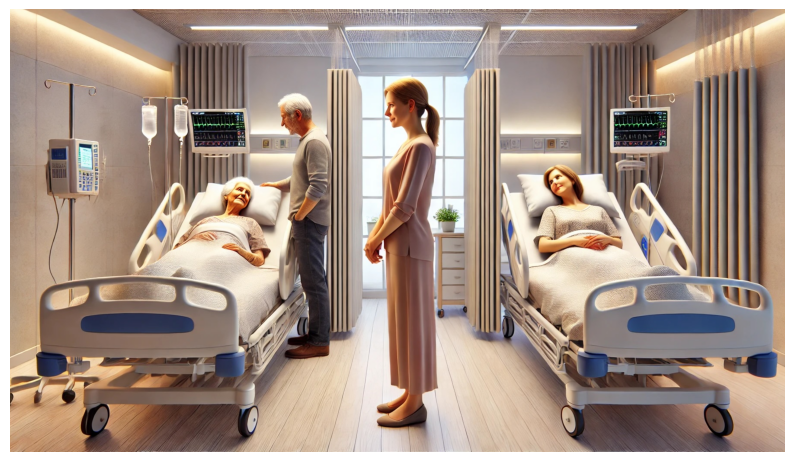

In [7]:
import json
from PIL import Image
import matplotlib.pyplot as plt


# Function to plot bounding boxes on the image
def image_generator(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Plot the bounding boxes on the image
img_path = "hospital_scene.jpeg"
image_generator(Image.open(img_path))


### <b>Aufgabe (2): Definition eines strukturierten Schemas für die Extraktion von Informationen</b>
Details zur Aufgabenstellung:
- Definierien Sie ein strukturiertes Schema (z. B. ein JSON-Schema), um die Informationen aus dem Bild `prescription1.jpg` zu organisieren. Das Schema sollte die Felder und die Struktur klar definieren, die für die Darstellung der extrahierten Daten erforderlich sind.

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>



### <b>Aufgabe (3): Extraktion von visuellen Informationen mittels Prompting</b>
Details zur Aufgabenstellung:
- Extrahieren Sie strukturierte visuelle Informationen aus dem Bild `prescription1.jpg` mithilfe von textualem Prompting (z.B. mit einem Vision Language Model), um die für die Patientenidentifikation benötigten Daten zu erhalten. Dies sollte dem zuvor definierten Schema folgen. 

*Hinweis: Je nach dem von Ihnen gewählten Modell kann die Syntax in Bezug auf Output mit strukturieten Schemas unterschiedlich sein. Konsultieren Sie die Modellspezifikationen zu diesem Thema und beziehen Sie sich darauf .*

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>



### <b>Aufgabe (4): Verarbeitung der textuellen Ausgabe der visuellen Extraktion</b>
Details zur Aufgabenstellung:
- Extrahieren und parsen Sie den JSON-Output der visuellen Extraktion in eine geeignete Datenstruktur.
  
  *Hinweis: In den Utils befindet sich eine Hilfsfunktion, die Sie benutzen können.*

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>



### <b>Aufgabe (5): Integration der extrahierten Daten in neuem Prompt für weitere Identifizierung</b>
Details zur Aufgabenstellung:
- Verwenden Sie die (oder einige) in dem vorherigen Output gewonnenen Informationen, um ein Prompt zu erstellen, die benötigt wird, um den Empfänger des Medikaments in der `hospital_scene.jpeg` zu identifizieren. Integrieren Sie diese Informationen automatisch mithilfe der in den vorherigen Zellen erstellten Datenstruktur. Identifizieren Sie anschliessend den Patienten und geben Sie die Koordinaten aus, die seine/ihre Position im Bild angeben.

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>



### <b>Aufgabe (6): Visualisierung von Bounding Boxes</b>
Details zur Aufgabenstellung:
- Plotten Sie die Bounding Boxes auf das Bild `hospital_scene.jpeg` und überprüfen Sie, ob die Erkennung plausibel ist. Speichern Sie das resultierende Bild als `hospital_scene_patient1_identified.jpeg`.

*Hinweis: In den Utils befindet sich Hilfsfunktionen, die Sie benutzen können.*

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>



### <b>Aufgabe (7): Pipeline Validation</b>
Details zur Aufgabenstellung:
- Testen Sie Ihre gesamte Code-Pipeline mit einem neuen Bild aus dem Ordner `extra_case/`. Wenden Sie exakt denselben Code an, den Sie bisher verwendet haben, und prüfen Sie, ob er auch mit diesem neuen Rezept für einen anderen Patienten funktioniert. 
- Passen Sie die Prompts gegebenenfalls an, um die Robustheit (Generability) zu verbessern. Ändern Sie jedoch nicht die bestehenden Zellen, sondern kopieren Sie den bisherigen Code hierhin und modifizieren Sie ihn als neue Version, sodass die Änderungen (Delta) sichtbar bleiben.
- Speichern Sie das resultierende Bild als `hospital_scene_patient2_identified.jpeg`.

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>



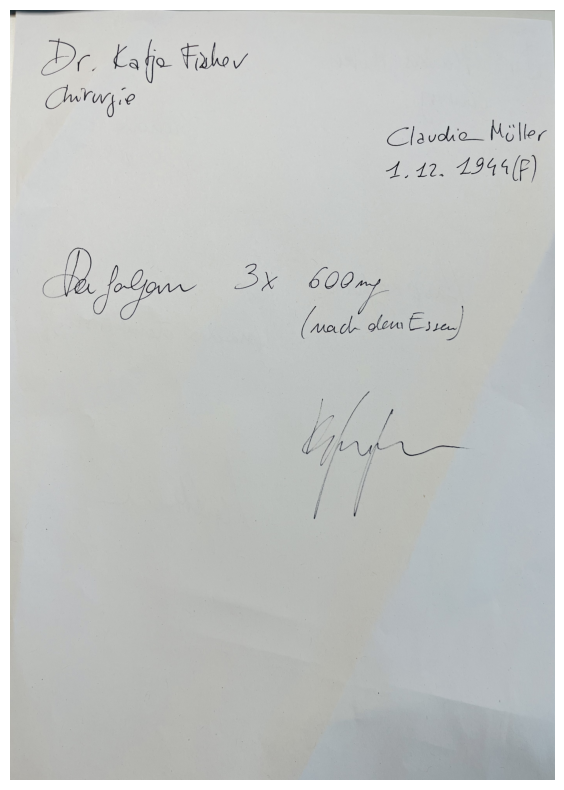

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('IP Address:', socket.gethostbyname(socket.gethostname()))
print('-----------------------------------')